# Stock Market Price prediction

In [ ]:
#packages

import pandas as pd
import pytz
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, accuracy_score


## Downloading stock price data

In [ ]:
import yfinance as yf

In [ ]:
ticker= yf.Ticker("GC=F")

In [ ]:
df= ticker.history(period= "10y")
#set period of data collected

In [ ]:
#Show data
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-10-08 00:00:00-04:00,1210.199951,1217.900024,1205.300049,1205.300049,9,0.0,0.0
2014-10-09 00:00:00-04:00,1223.900024,1229.000000,1223.900024,1224.599976,19,0.0,0.0
2014-10-10 00:00:00-04:00,1223.500000,1223.500000,1217.000000,1221.000000,186,0.0,0.0
2014-10-13 00:00:00-04:00,1229.800049,1234.000000,1227.000000,1229.300049,103,0.0,0.0
2014-10-14 00:00:00-04:00,1235.900024,1235.900024,1233.599976,1233.599976,73,0.0,0.0
...,...,...,...,...,...,...,...
2024-10-02 00:00:00-04:00,2650.600098,2657.199951,2640.000000,2647.100098,72,0.0,0.0
2024-10-03 00:00:00-04:00,2642.800049,2657.100098,2640.000000,2657.100098,354,0.0,0.0
2024-10-04 00:00:00-04:00,2656.000000,2667.000000,2639.000000,2645.800049,114,0.0,0.0


## Cleaning and visualising price data.

Convert timezone to Harare, Zimbabwe time.

In [ ]:
df=df.tz_convert("africa/harare")

In [ ]:
del df["Dividends"]
del df["Stock Splits"]

In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2014-10-08 06:00:00+02:00,1210.199951,1217.900024,1205.300049,1205.300049,9
2014-10-09 06:00:00+02:00,1223.900024,1229.000000,1223.900024,1224.599976,19
2014-10-10 06:00:00+02:00,1223.500000,1223.500000,1217.000000,1221.000000,186
2014-10-13 06:00:00+02:00,1229.800049,1234.000000,1227.000000,1229.300049,103
2014-10-14 06:00:00+02:00,1235.900024,1235.900024,1233.599976,1233.599976,73
...,...,...,...,...,...
2024-10-02 06:00:00+02:00,2650.600098,2657.199951,2640.000000,2647.100098,72
2024-10-03 06:00:00+02:00,2642.800049,2657.100098,2640.000000,2657.100098,354
2024-10-04 06:00:00+02:00,2656.000000,2667.000000,2639.000000,2645.800049,114


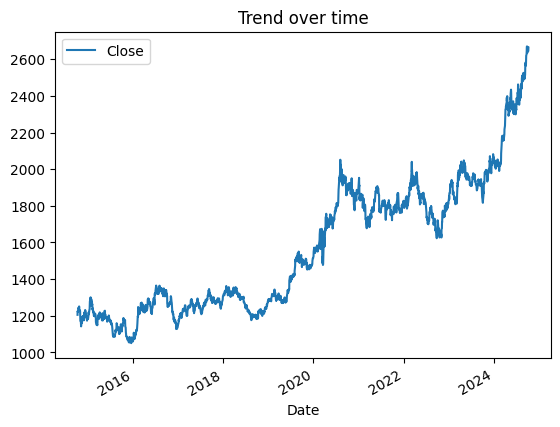

In [ ]:
df.plot.line(y="Close", title= "Trend over time", use_index=True);

## Setting up Prediction.

In [ ]:
#creating a next day column and the closing price
df["Next Day"]= df["Close"].shift(-1)

In [ ]:
df["Target"] = (df["Next Day"] >df["Close"]).astype(int)

In [ ]:
df

,Open,High,Low,Close,Volume,Next Day,Target
Date,,,,,,,
2014-10-08 06:00:00+02:00,1210.199951,1217.900024,1205.300049,1205.300049,9,1224.599976,1
2014-10-09 06:00:00+02:00,1223.900024,1229.000000,1223.900024,1224.599976,19,1221.000000,0
2014-10-10 06:00:00+02:00,1223.500000,1223.500000,1217.000000,1221.000000,186,1229.300049,1
2014-10-13 06:00:00+02:00,1229.800049,1234.000000,1227.000000,1229.300049,103,1233.599976,1
2014-10-14 06:00:00+02:00,1235.900024,1235.900024,1233.599976,1233.599976,73,1244.099976,1
...,...,...,...,...,...,...,...
2024-10-02 06:00:00+02:00,2650.600098,2657.199951,2640.000000,2647.100098,72,2657.100098,1
2024-10-03 06:00:00+02:00,2642.800049,2657.100098,2640.000000,2657.100098,354,2645.800049,0
2024-10-04 06:00:00+02:00,2656.000000,2667.000000,2639.000000,2645.800049,114,2644.800049,0


Target is if the price will go up or down on the next day.

 1 means price will go up,  0 means price will go down.


## Building and training a model

In [ ]:
#instatiate model
model= RandomForestClassifier(random_state=1)

#predictors/ feature matrix
X= ["Close", "Volume", "High", "Low", "Open"]
#target vector
y= "Target"

#train and test sets
train= df.iloc[:-100]
test= df.iloc[-100:]

#train the model
model.fit(train[X], train[y])

RandomForestClassifier(random_state=1)

## Evaluating the model

In [ ]:
preds= model.predict(test[X]) #  numpy array output of predictions.

In [ ]:
#convert numpy array to series
preds= pd.Series(preds, index=test.index, name="Next day prediction")

In [ ]:
precision_score(test[y], preds)

0.5142857142857142

In [ ]:
accuracy_score(test[y], preds)

0.45

The precision score shows how accurately the model predicted that the price would go up.

## Results

In [ ]:
pred_res= pd.concat([test[y], preds], axis=1)

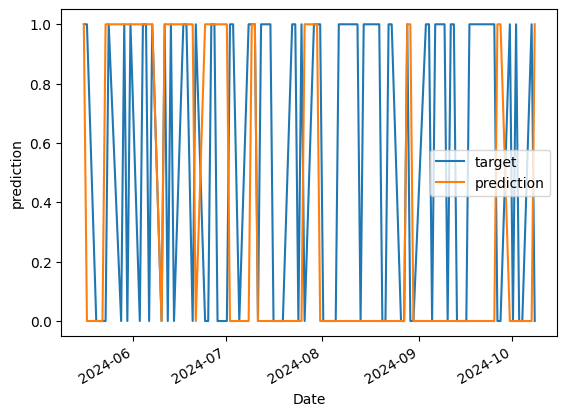

In [ ]:
pred_res.plot(ylabel="prediction")
plt.legend(["target", "prediction"]);

In [ ]:
preds.tail()

,Next day prediction
Date,
2024-10-02 06:00:00+02:00,0
2024-10-03 06:00:00+02:00,0
2024-10-04 06:00:00+02:00,0
2024-10-07 06:00:00+02:00,0
2024-10-08 06:00:00+02:00,1


The Prediction is of the next trading day.

1 means the price is predicted to go up.
0 means the price is predicted to go down.